0.0


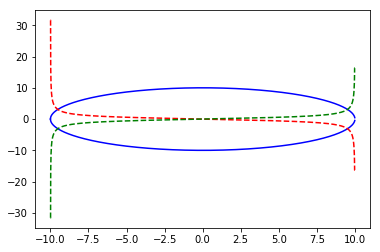

In [77]:
import numpy as np
import matplotlib.pyplot as py
from sympy import *
%matplotlib inline


## Spacing of incident light rays
a = 0.01   

## Positions of the sides of the lens in mm
L = -10
R = 10


x = np.arange(L,R,a)
N = int((R - L)/a)

n0 = 1                ## Index of refraction for medium 1 (probably air)
n1 = 1.5              ## Index of refraction for lens medium
n2 = 1                ## Index of refraction for outgoing medium (probably same as n0)

 
f1 = np.sqrt(100 - x**2)   ## Insert functionality of top surface here (no offset yet)

f2 = -np.sqrt(100 - x**2)     ## Insert functionality of bottom surface here (no offset yet)

######### Set minimum thickness (t) and roughly center the lens in the window ########
t = 0

df = np.empty(len(x))

for i in range(len(x)):
    df[i] = f1[i] - f2[i]
    
delta = min(df)
y0 = f1[0]

f1 = f1 - y0
f2 = f2 - y0 + delta - t

####################################################################################
py.plot(x,f1,'b',  x,f2,'b')


d1 = np.empty(len(x))
d2 = np.empty(len(x))

for i in range (1,len(x)-1):
    d1[i] = (f1[i+1] - f1[i-1])/(x[i+1] - x[i-1])
    d2[i] = (f2[i+1] - f2[i-1])/(x[i+1] - x[i-1])
    
d1[0] = d1[1]
d1[-1] = d1[-2]

d2[0] = d2[1]
d2[-1] = d2[-2]

py.plot(x,d1,'r--', x,d2,'g--')
print(delta)

C:\Users\Eli\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in arcsin


947


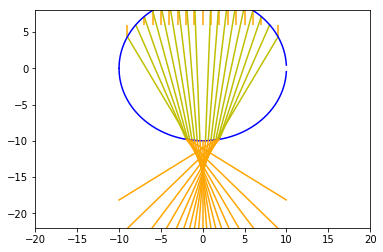

In [78]:
sign1 = d1/abs(d1)
omit1 = (d1/abs(d1) + 1)/2


th0 = np.pi/2 - sign1*np.arctan(1/d1)
th1 = np.arcsin(n0*np.sin(th0)/n1)

for i in range(len(x)):
    if(d1[i] == 0):
        th0[i] = 0
        th1[i] = 0

m1 = np.tan(np.arctan(-1/d1) - sign1*th1)

##m1 = (1/d1)*(sign1*d1**2 - np.sqrt(r1 + (r1 - 1)*d1**2))/(np.sqrt(r1 + (r1 - 1)*d1**2) + sign1)  ## Slope of ray inside lens medium

y1 = np.zeros([len(x),len(x)])
y2 = np.zeros([len(x),len(x)])
diff1 = np.zeros([len(x),len(x)])
ints = np.zeros(len(x))
ff2 = np.zeros(len(x))
dd2 = np.zeros(len(x))

for i in range(len(x)):
    for j in range(len(x)):
        y1[i,j] = m1[i]*(x[j] - x[i]) + f1[i]
        diff1[i,j] = abs(f2[j] - y1[i,j])
    
    ints[i] = int(np.argmin(diff1[i,:]))
    

for i in range(100,len(x),100):            ## This iterates through all incoming beams from left to right and plots every 100 points
    j = int(ints[i])
    
    py.vlines(x[i],f1[i],6,color="orange")
    if(d1[i] == 0):
        py.vlines(x[i],f2[i],f1[i],'y')
    if(i<j):
        py.plot(x[i:j+1],y1[i,i:j+1],'y')
    else:
        py.plot(x[j:i+1],y1[i,j:i+1],'y')
py.plot(x,f1,'b',  x,f2,'b')
py.xlim(-20,20)
py.ylim(-22,8)


# Converting the lower curve and its slope to have inputs of only the rays which hit it

for i in range(len(x)):
    j = int(ints[i])
    ff2[i] = f2[j]
    dd2[i] = d2[j]
    
sign2 = dd2/abs(dd2)
sign3 = m1/abs(m1)
omit2 = (dd2/abs(dd2) + 1)/2    # Multiply in to add a term only if slope of lower surface is positive
omit3 = (-m1/abs(m1) + 1)/2    # Same but for slope of ray inside medium (m1)

th2 = -(np.arctan(-1/dd2) + omit2*np.pi) + (np.arctan(m1) + omit3*np.pi)
th3 = np.arcsin(n1*np.sin(th2)/n2)
m2 = np.tan(np.arctan(dd2) - np.pi/2 + th3)


'''for i in range(len(x)):
    
    j = int(ints[i])
    if (d2[j]*m1[i] < 0):
        th3[i] = np.arcsin((n2*np.sqrt(1 + (1 + abs(m1[i]/d2[j]))**2/(-abs(m1[i]) + abs(1/d2[j]))**2)/n1)**-1)   ## Outgoing angle as measured from the surface normal
        m2[i] = (1 + abs(d2[j])*np.tan(th3[i]))*m1[i]/((np.tan(th3[i]) - abs(d2[j]))*abs(m1[i]))                  ## Slope of outgoing line
    else:
        th3[i] = np.arcsin((n2*np.sqrt(1 + (1 - abs(m1[i]/d2[j]))**2/(abs(m1[i]) + abs(1/d2[j]))**2)/n1)**-1)   ## Outgoing angle as measured from the surface normal
        m2[i] = (1 + abs(d2[j])*np.tan(th3[i]))*m1[i]/((np.tan(th3[i]) - abs(d2[j]))*abs(m1[i]))                  ## Slope of outgoing line
        '''
        
        
for i in range(len(x)):
    k = int(ints[i])
    for j in range(len(x)):
        y2[i,j] = m2[i]*(x[j] - x[k]) + ff2[i]

for i in range(100,len(x),100):            ## This iterates through all outgoing beams from left to right and plots every 100 points
    j = int(ints[i])
    
    if(m2[i] > 0):
        py.plot(x[:j+1],y2[i,:j+1],color="orange")
    else:
        py.plot(x[j:-1],y2[i,j:-1],color="orange")

print(int(ints[20]))

#py.plot(x,f1,'b',  x,f2,'b',  x,y1[10,:],'y',  x,y1[80,:],'r')
#py.ylim(1.1*min(f2),1.1*max(f1))

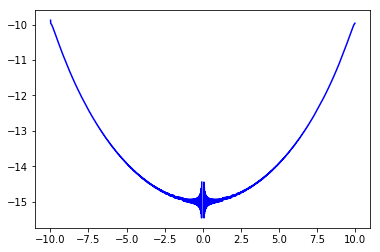

In [79]:
focus = np.empty(len(x))

for i in range(len(x)):
    k = int(ints[i])
    focus[i] = ff2[i] - m2[i]*x[k]
    
n = int(N/2)
m = 6
    
py.plot(x[:n-m],focus[:n-m],'b',   x[n+m:],focus[n+m:],'b')
